In [1]:
# Load data
data(iris)
head(iris, 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


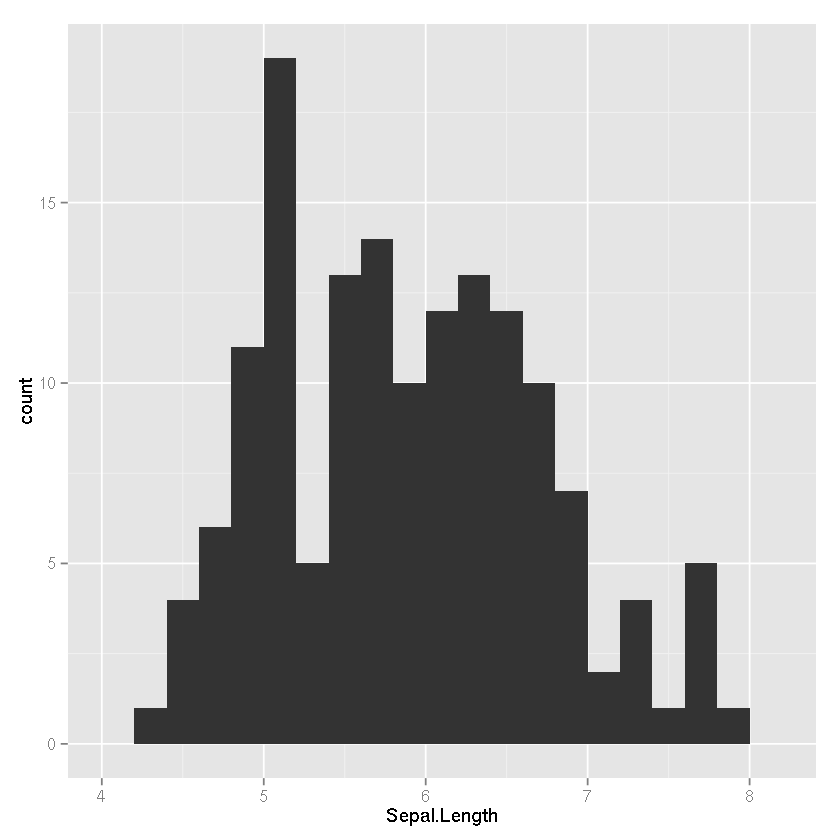

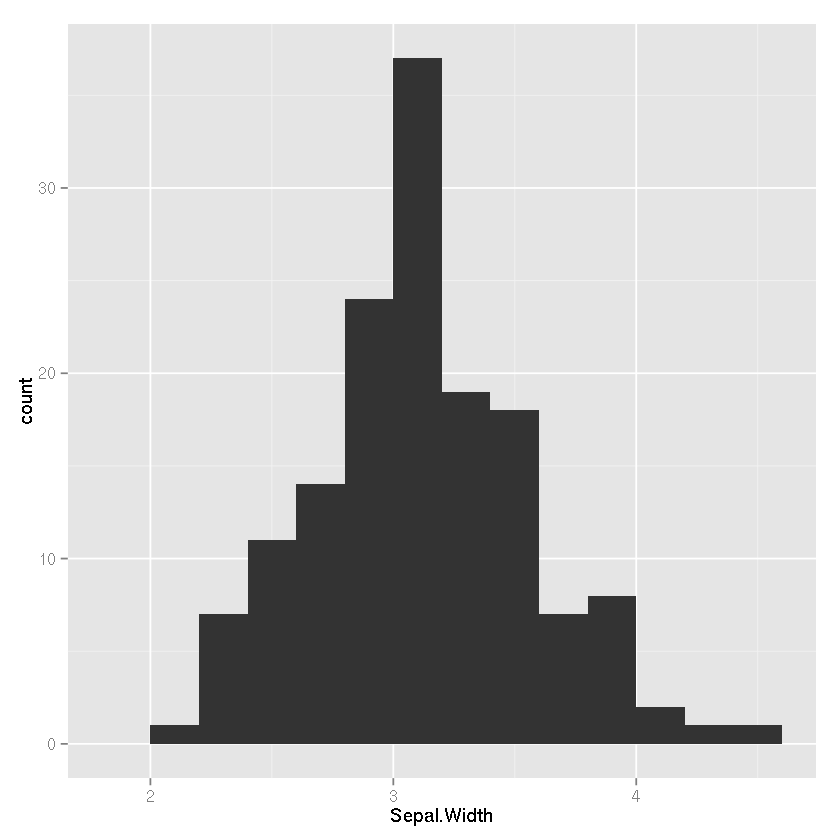

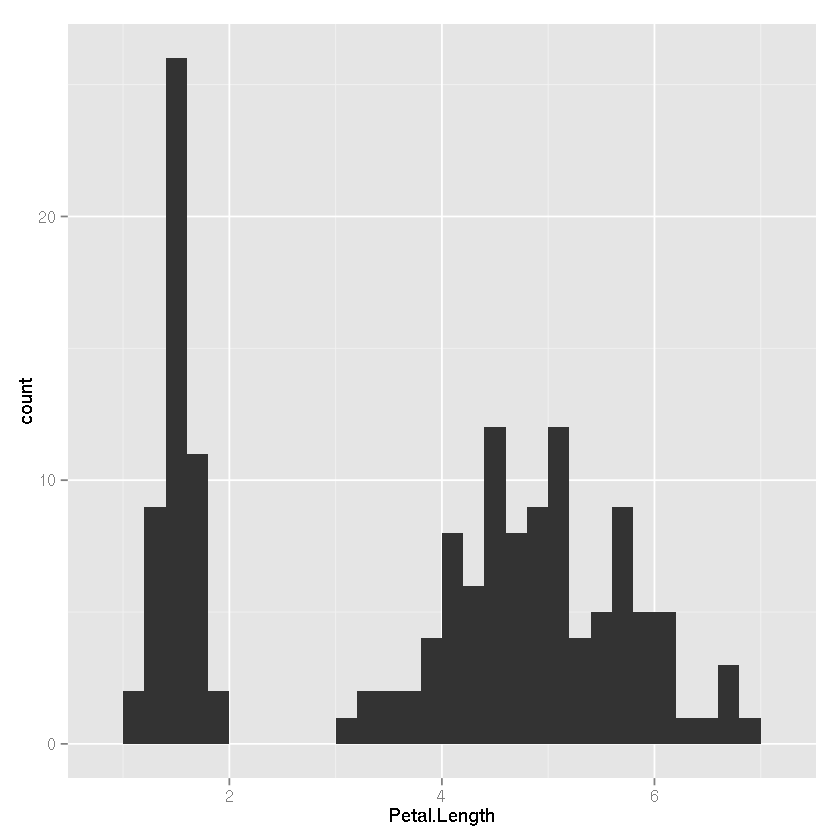

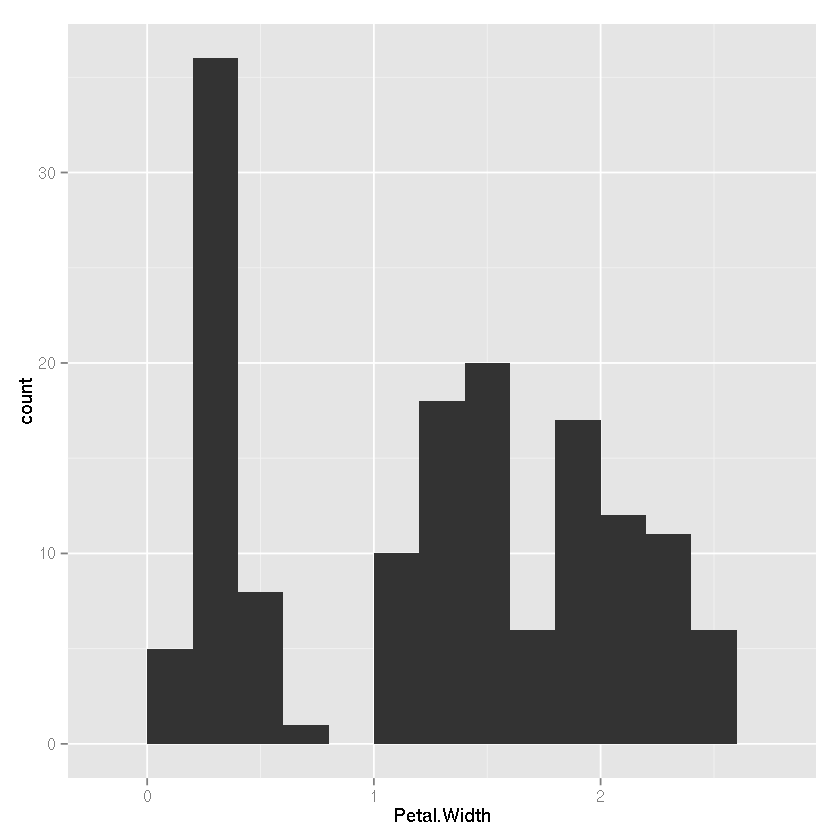

In [6]:
require(ggplot2)

print(ggplot(iris, aes(Sepal.Length)) + geom_bar(binwidth=0.2))
print(ggplot(iris, aes(Sepal.Width)) + geom_bar(binwidth=0.2))
print(ggplot(iris, aes(Petal.Length)) + geom_bar(binwidth=0.2))
print(ggplot(iris, aes(Petal.Width)) + geom_bar(binwidth=0.2))

Standard deviations:
[1] 1.7124583 0.9523797 0.3647029 0.1656840

Rotation:
                    PC1         PC2        PC3         PC4
Sepal.Length  0.5038236 -0.45499872  0.7088547  0.19147575
Sepal.Width  -0.3023682 -0.88914419 -0.3311628 -0.09125405
Petal.Length  0.5767881 -0.03378802 -0.2192793 -0.78618732
Petal.Width   0.5674952 -0.03545628 -0.5829003  0.58044745
Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7125 0.9524 0.36470 0.16568
Proportion of Variance 0.7331 0.2268 0.03325 0.00686
Cumulative Proportion  0.7331 0.9599 0.99314 1.00000


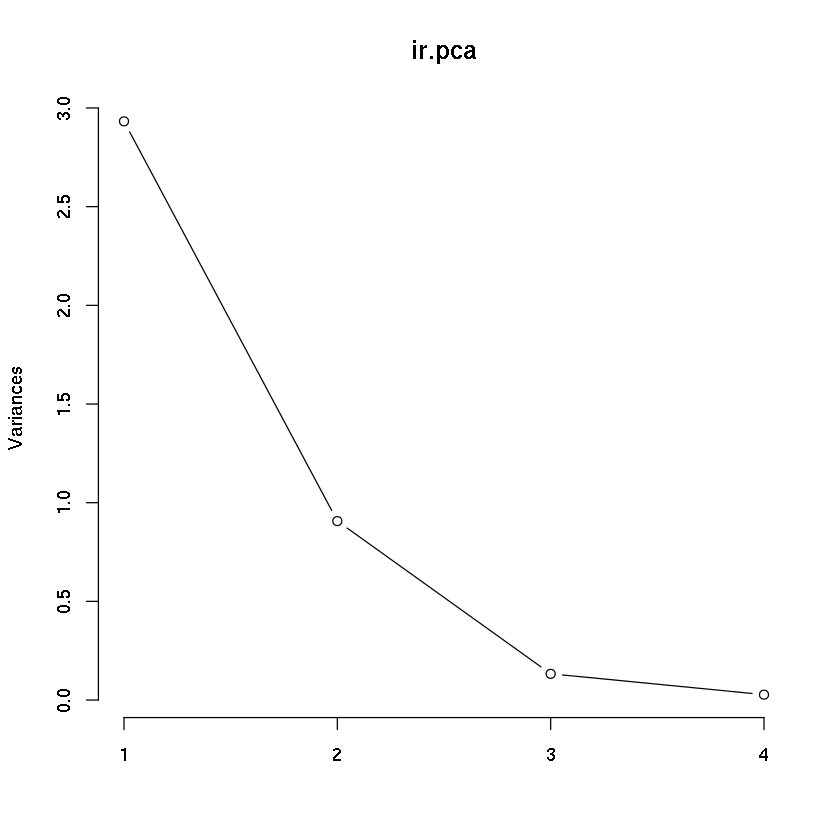

In [11]:
# log transform 
log.ir <- log(iris[, 1:4])
ir.species <- iris[, 5]
 
# apply PCA - scale. = TRUE is highly 
# advisable, but default is FALSE. 
ir.pca <- prcomp(log.ir,
                 center = TRUE,
                 scale = TRUE) 

print(ir.pca)
print(summary(ir.pca))
plot(ir.pca, type = "l")

In [12]:
# Predict PCs
predict(ir.pca, 
        newdata=tail(log.ir, 2))

,PC1,PC2,PC3,PC4
149,1.08099298,-1.01155751,-0.70822894,-0.06811063
150,0.97121161,-0.06158655,-0.50086737,-0.12411524


In [13]:
#library(devtools)
#install_github("ggbiplot", "vqv")

Warning message:
: Username parameter is deprecated. Please use vqv/ggbiplotDownloading GitHub repo vqv/ggbiplot@master
Installing ggbiplot
'/home/yannick/bin/anaconda3/lib/R/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore CMD INSTALL  \
  '/tmp/RtmpS0yn9t/devtools142944a10f2/vqv-ggbiplot-7325e88'  \
  --library='/home/yannick/R/x86_64-pc-linux-gnu-library/3.2' --install-tests 



Loading required package: plyr
Loading required package: scales
Loading required package: grid


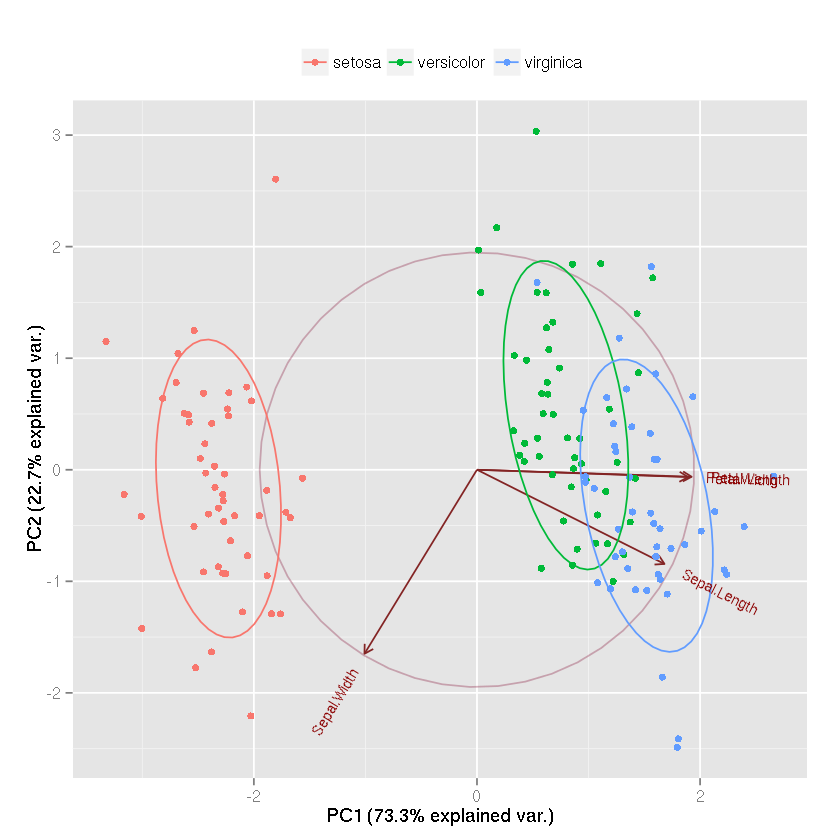

In [14]:
library(ggbiplot)
g <- ggbiplot(ir.pca, obs.scale = 1, var.scale = 1, 
              groups = ir.species, ellipse = TRUE, 
              circle = TRUE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', 
               legend.position = 'top')
print(g)

In [20]:
require(caret)
trans = preProcess(iris[,1:4], 
                   method=c("BoxCox", "center", 
                            "scale", "pca"))
print(trans)

PC = predict(trans, iris[,1:4])
print (head(PC))


Call:
preProcess.default(x = iris[, 1:4], method = c("BoxCox", "center",
 "scale", "pca"))

Created from 150 samples and 4 variables
Pre-processing: Box-Cox transformation, centered, scaled, principal
 component signal extraction 

Lambda estimates for Box-Cox transformation:
-0.1, 0.3, 0.9, 0.6
PCA needed 2 components to capture 95 percent of the variance
        PC1        PC2
1 -2.303540 -0.4748260
2 -2.151310  0.6482903
3 -2.461341  0.3463921
4 -2.413968  0.6066839
5 -2.432777 -0.6110057
6 -1.979172 -1.3950594
